author : 
> Nabiel Husein Shihab / nabielshihab@hotmail.com

# **Perbandingan CBA**
***


Script ini dibuat untuk membandingkan variasi Complete Bouger Anomaly (CBA) yang didapat dari tiga metode ukur elevasi yang berbeda, yaitu Altimeter, GPS, dan Levelling. Terdapat 2 kelompok yang melakukan akuisisi data gravitasi. User dapat memilih kelompok 1 atau 2 yang akan dianalisis variasi CBA-nya.
***

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# visualisasi template
plt.style.use('ggplot')
plt.rcParams["font.size"] = "15"

# 1. Load Data

Dataset kita merupakan file excel yang terdiri dari beberapa worksheets

In [2]:
# penentuan kelompok 1 atau 2
kelompok = 1

# read file
df = pd.ExcelFile(f"dataset\\Pengolahan Kelompok {kelompok}.xlsx")
df.sheet_names

['Levelling', 'Elevasi', 'Pengolahan', 'Gobs & CBA']

In [3]:
# membaca file excel dalam worksheet Elevasi
df_elevasi = df.parse('Elevasi')
df_elevasi = df_elevasi.set_index('STS ID')
df_elevasi = df_elevasi.iloc[:,0:5]

df_elevasi.head()

UTM X (m)  UTM Y (m)  Z GPS terkoreksi (m)  Z Alti terkoreksi (m)  \
STS ID                                                                      
BSC-B      788633    9237723            766.000000             766.000000   
S1         788248    9237361            719.510000             782.823760   
S2         788244    9237398            738.585000             777.914804   
S3         788245    9237443            742.493333             781.623117   
S4         788239    9237497            742.551667             781.326369   

        Z Levelling terkoreksi (m)  
STS ID                              
BSC-B                      766.000  
S1                         764.360  
S2                         765.285  
S3                         767.805  
S4                         767.640

In [4]:
# membaca file excel dalam worksheet Gobs & CBA
df_anomali = df.parse('Gobs & CBA')
df_anomali = df_anomali.set_index('STS ID')

df_anomali.head()

UTM X (m)  UTM Y (m)     lon (째)   lat (째)       Gobs GPS  \
STS ID                                                              
BSC-B      788633    9237723  107.611725 -6.889084  977968.595190   
S1         788248    9237361  107.608256 -6.891471  977969.529424   
S2         788244    9237398  107.608223 -6.892040  977969.601611   
S3         788245    9237443  107.608230 -6.891633  977969.223744   
S4         788239    9237497  107.608173 -6.891146  977968.971731   

           G obs Alti  G obs Levelling    CBA GPS   CBA Alti  CBA Levelling  
STS ID                                                                       
BSC-B   977968.595190    977968.595190  12.302284  12.302284      12.302284  
S1      977969.529424    977969.529424   4.040685  16.494522      12.862695  
S2      977969.601612    977969.601612   7.950372  15.686557      13.202270  
S3      977969.223744    977969.223744   8.474189  16.171030      13.453002  
S4      977968.971731    977968.971731   8.244122  15.871118      13.179005

# 2. Plot stasiun

Text(0, 0.5, 'UTM Y (m)')

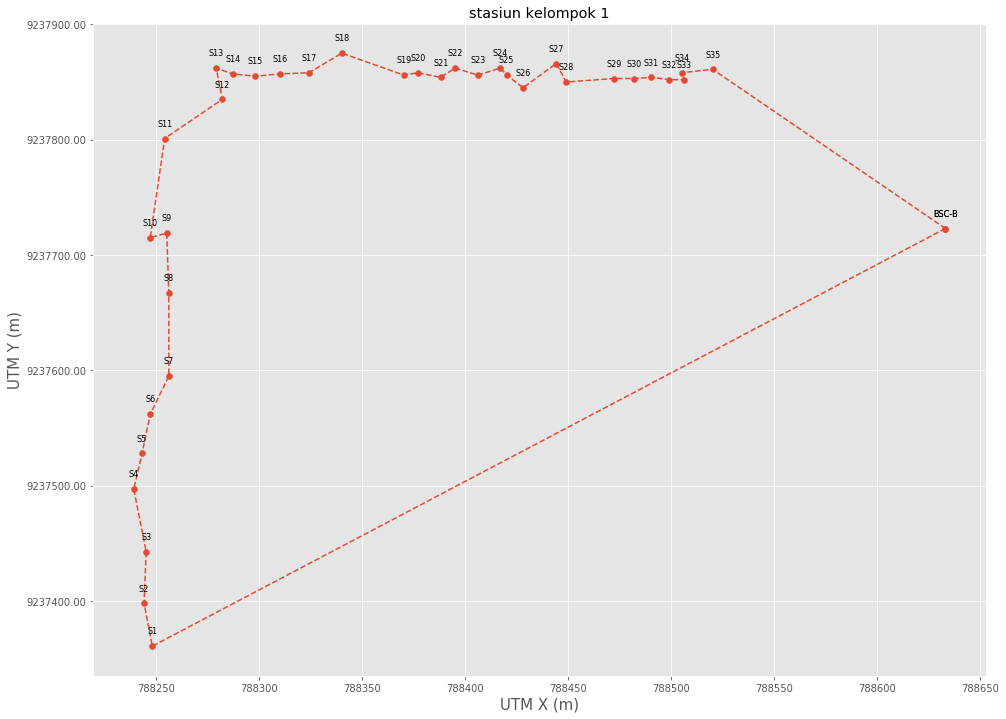

In [6]:
# visualisasi
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.scatter(df_anomali.iloc[:,0], df_anomali.iloc[:,1])
ax.plot(df_anomali.iloc[:,0], df_anomali.iloc[:,1], ls='--')
ax.set_title(f'stasiun kelompok {kelompok}')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
for i in range(df_anomali.shape[0]):
    ax.text(df_anomali.iloc[:,0][i],  df_anomali.iloc[:,1][i]+13,
             f"{format(df_anomali.index[i])}",
             ha='center', va='center',
             size=8)
ax.set_xlabel('UTM X (m)', fontsize=15)
ax.set_ylabel('UTM Y (m)', fontsize=15)
# fig.savefig(f'kelompok {kelompok} stasiun.png')

# 3. Perbandingan Elevasi

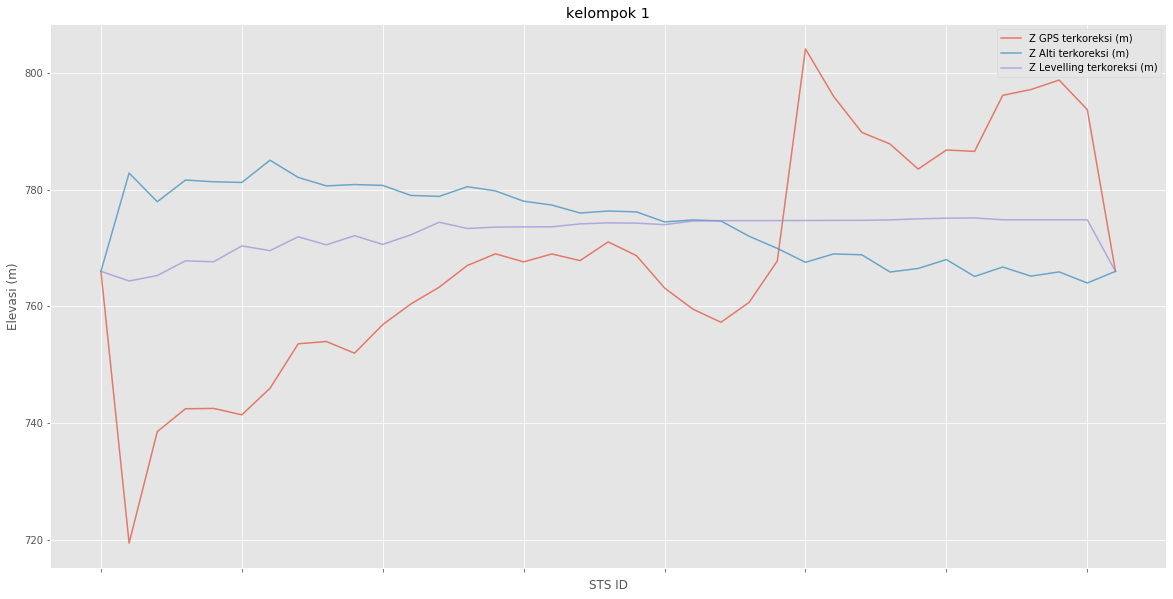

In [7]:
# visualisasi perbandingan elevasi
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df_elevasi.iloc[:, 2:5].plot(ax=ax, alpha=0.7)
ax.set_ylabel('Elevasi (m)')
ax.set_title(f'kelompok {kelompok}')
plt.show()
# fig.savefig(f'kelompok {kelompok} elevasi.png')

In [8]:
# deskripsi statistik
df_elevasi.iloc[:,2:5].describe()

Z GPS terkoreksi (m)  Z Alti terkoreksi (m)  Z Levelling terkoreksi (m)
count             37.000000              37.000000                   37.000000
mean             767.877027             774.234184                  772.479838
std               19.700905               6.492883                    3.202480
min              719.510000             764.009237                  764.360000
25%              756.891667             767.549534                  770.610000
50%              767.000000             775.985334                  774.120000
75%              786.530000             780.484191                  774.720000
max              804.060000             785.018457                  775.145000

Text(0.5, 1.0, 'kelompok 1')

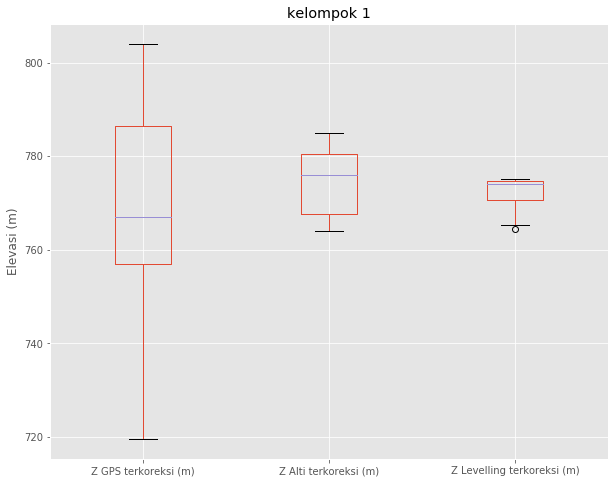

In [9]:
# whisker plot
plt.figure(figsize=(10,8))
df_elevasi.iloc[:, 2:5].boxplot()
plt.ylabel('Elevasi (m)')
plt.title(f'kelompok {kelompok}')
# plt.savefig(f'kelompok {kelompok} elevasi boxplot.png')

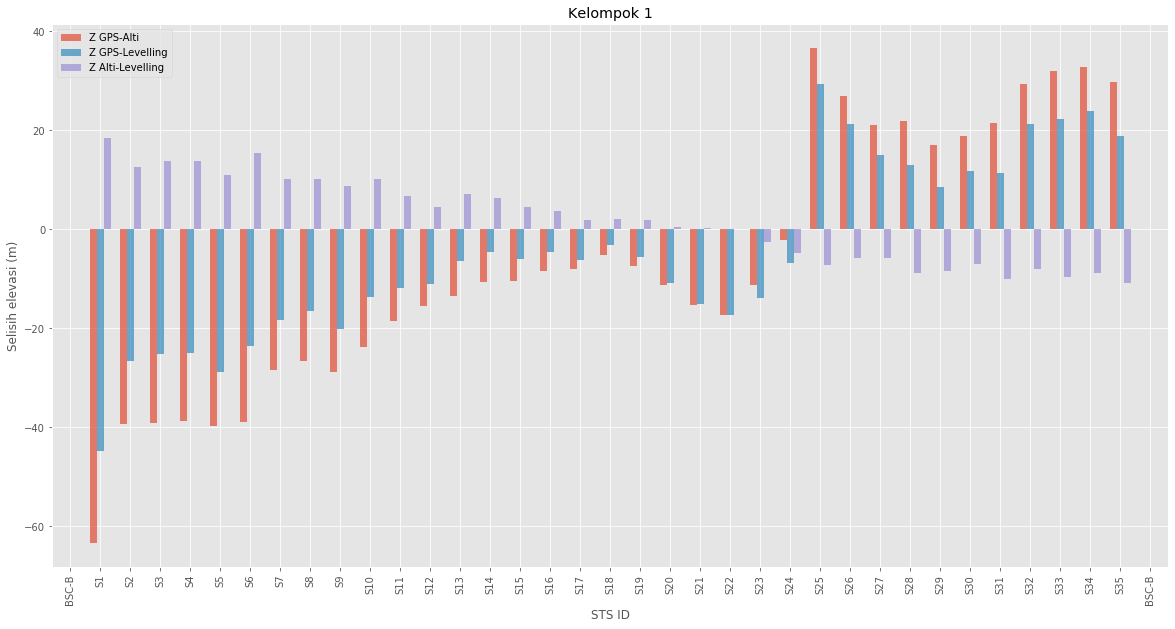

In [10]:
# menghitung selisih elevasi antaralat ukur
z_gps_alti = df_elevasi['Z GPS terkoreksi (m)'] - df_elevasi['Z Alti terkoreksi (m)']
z_gps_level = df_elevasi['Z GPS terkoreksi (m)'] - df_elevasi['Z Levelling terkoreksi (m)']
z_alti_level = df_elevasi['Z Alti terkoreksi (m)'] - df_elevasi['Z Levelling terkoreksi (m)']

# memasukkan ke dalam tabel elevasi
df_elevasi['Z GPS-Alti'] = z_gps_alti
df_elevasi['Z GPS-Levelling'] = z_gps_level
df_elevasi['Z Alti-Levelling'] = z_alti_level

# plotting selisih elevasi
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df_elevasi.iloc[:, 5:8].plot(ax=ax, kind='bar', width=0.7, alpha=0.7)
ax.set_ylabel('Selisih elevasi (m)')
ax.set_title(f'Kelompok {kelompok}')
plt.show()
# fig.savefig(f'kelompok {kelompok} elevasi selisih barplot.png')

In [11]:
# deskripsi dari selisih elevasi antaralat ukur
df_elevasi.iloc[:, 5:8].describe()

Z GPS-Alti  Z GPS-Levelling  Z Alti-Levelling
count   37.000000        37.000000         37.000000
mean    -6.357157        -4.602811          1.754346
std     25.296979        17.540286          8.349897
min    -63.313760       -44.850000        -10.814263
25%    -23.816488       -16.540000         -5.894074
50%    -10.377497        -6.276667          1.865334
75%     18.745654        11.385000          8.751957
max     36.510466        29.355000         18.463760

# 4. Perbandingan G obs

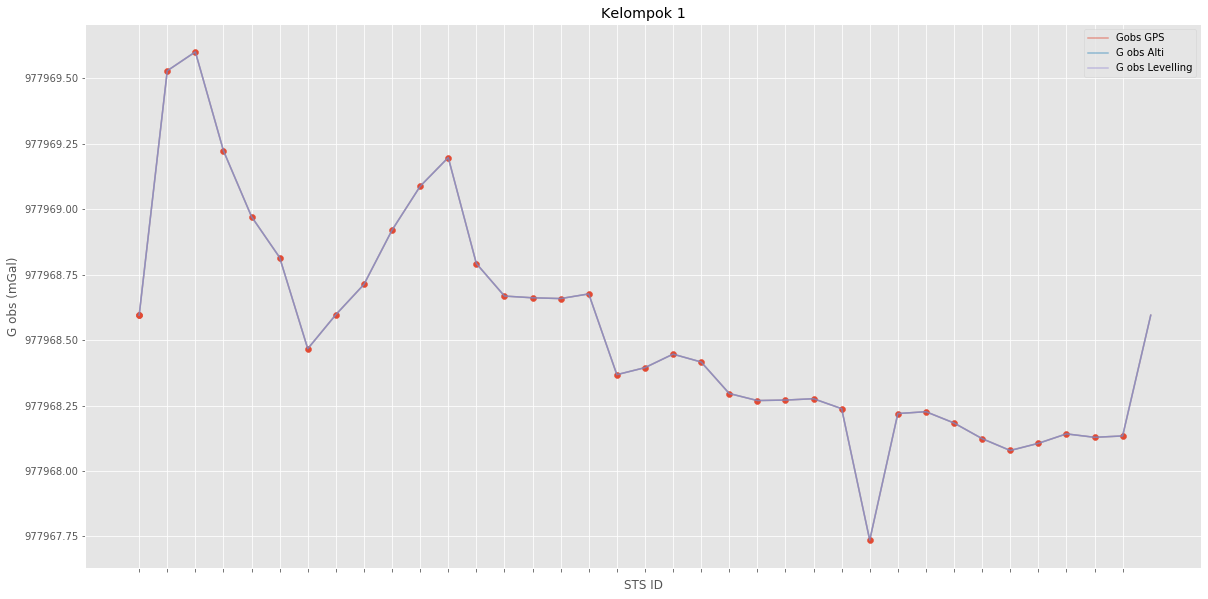

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df_anomali.iloc[:, 4:7].plot(ax=ax, alpha=0.5)
ax.scatter(x=df_anomali.index[:], y=df_anomali['Gobs GPS'])
plt.ylabel('G obs (mGal)')
plt.title(f'Kelompok {kelompok}')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# fig.savefig(f'kelompok {kelompok} G obs.png')

In [13]:
# deskripsi G obs antaralat ukur
df_anomali.iloc[:, 4:7].describe()

Gobs GPS     G obs Alti  G obs Levelling
count      37.000000      37.000000        37.000000
mean   977968.535884  977968.535884    977968.535884
std         0.420640       0.420640         0.420640
min    977967.735711  977967.735711    977967.735711
25%    977968.226477  977968.226477    977968.226477
50%    977968.446452  977968.446452    977968.446452
75%    977968.713021  977968.713021    977968.713021
max    977969.601611  977969.601612    977969.601612

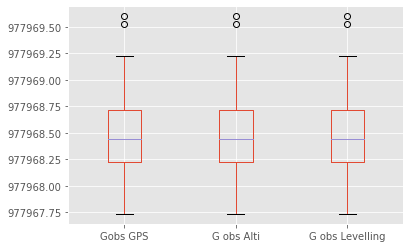

In [14]:
# deskripsi G obs antaralat ukur
ax = plt.subplot(111)
df_anomali.iloc[:, 4:7].boxplot(ax=ax)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# 5. Perbandingan CBA

Text(0.5, 1.0, 'kelompok 1 perbandingan CBA')

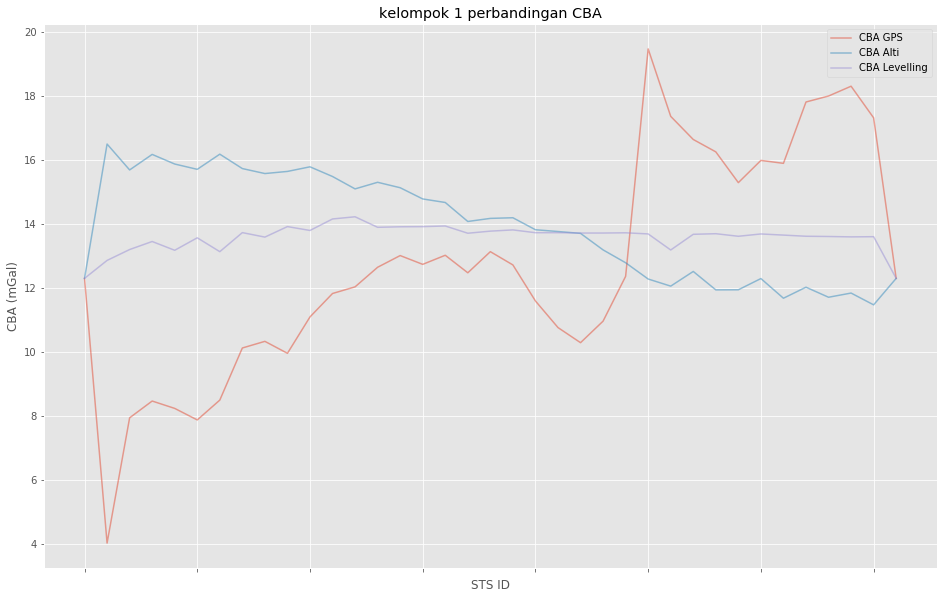

In [15]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
df_anomali.iloc[:, 7:10].plot(ax=ax, alpha=0.5)
plt.ylabel('CBA (mGal)')
plt.title(f'kelompok {kelompok} perbandingan CBA')
# fig.savefig(f'kelompok {kelompok} CBA.png')

In [16]:
# deskripsi CBA antaralat ukur
df_anomali.iloc[:, 7:10].describe()

CBA GPS   CBA Alti  CBA Levelling
count  37.000000  37.000000      37.000000
mean   12.679492  13.929947      13.584867
std     3.512100   1.645058       0.411757
min     4.040685  11.475970      12.302284
25%    10.336912  12.296545      13.590335
50%    12.365504  14.078048      13.689598
75%    15.892499  15.573758      13.776625
max    19.463735  16.494522      14.224575

Text(0.5, 1.0, 'kelompok 1 CBA')

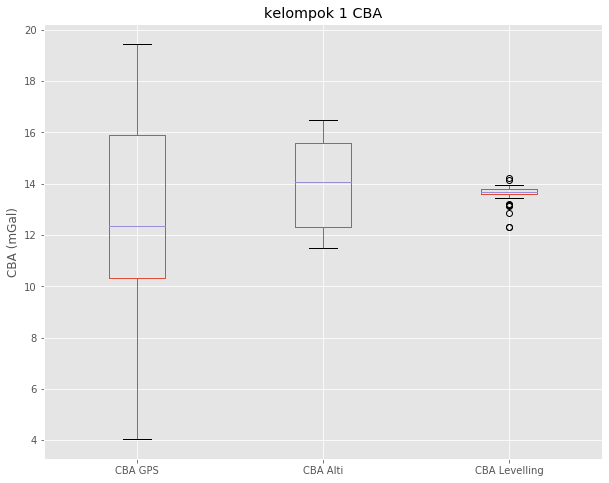

In [17]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
df_anomali.iloc[:, 7:10].boxplot(ax=ax)
plt.ylabel('CBA (mGal)')
plt.title(f'kelompok {kelompok} CBA')
# fig.savefig(f'kelompok {kelompok} CBA boxplot.png')

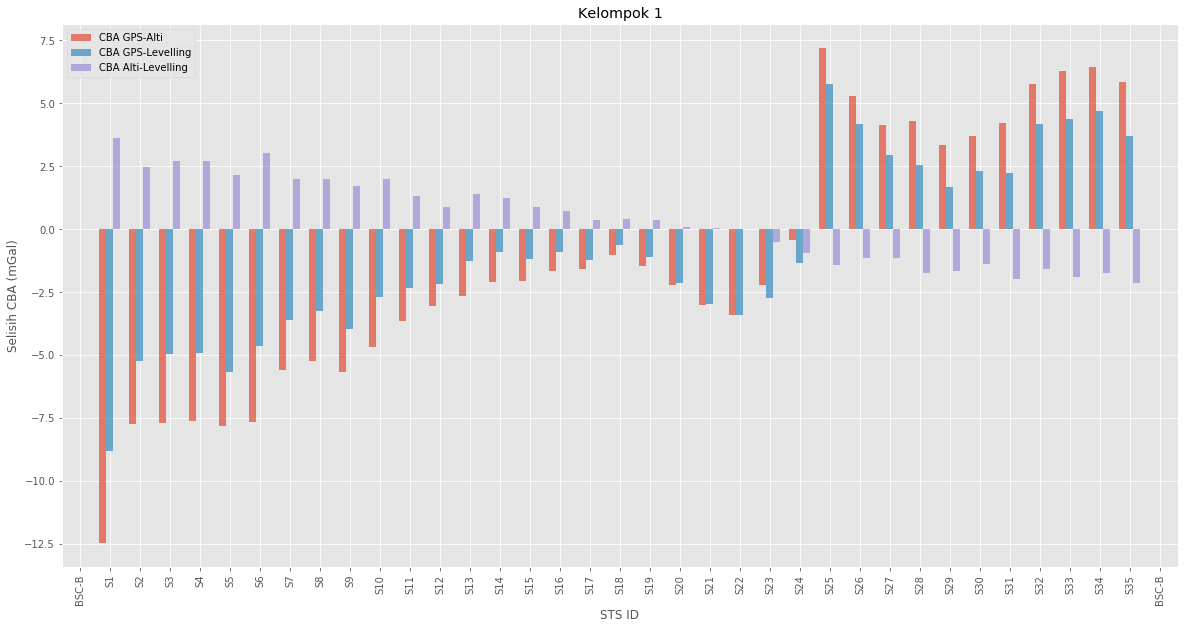

In [18]:
# menghitung selisih elevasi antaralat ukur
cba_gps_alti = df_anomali['CBA GPS'] - df_anomali['CBA Alti']
cba_gps_level = df_anomali['CBA GPS'] - df_anomali['CBA Levelling']
cba_alti_level = df_anomali['CBA Alti'] - df_anomali['CBA Levelling']

# memasukkan ke dalam tabel elevasi
df_anomali['CBA GPS-Alti'] = cba_gps_alti
df_anomali['CBA GPS-Levelling'] = cba_gps_level
df_anomali['CBA Alti-Levelling'] = cba_alti_level

# plotting selisih elevasi
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df_anomali.iloc[:, 10:13].plot(ax=ax, kind='bar', width=0.7, alpha=0.7)
ax.set_ylabel('Selisih CBA (mGal)')
ax.set_title(f'Kelompok {kelompok}')
plt.show()
# fig.savefig(f'kelompok {kelompok} CBA selisih barplot.png')

In [19]:
# deskripsi dari selisih elevasi antaralat ukur
df_anomali.iloc[:, 10:13].describe()

CBA GPS-Alti  CBA GPS-Levelling  CBA Alti-Levelling
count     37.000000          37.000000           37.000000
mean      -1.250455          -0.905374            0.345080
std        4.975923           3.450179            1.642427
min      -12.453836          -8.822009           -2.127169
25%       -4.684710          -3.253423           -1.159366
50%       -2.041257          -1.234622            0.366912
75%        3.687276           2.239433            1.721512
max        7.181619           5.774137            3.631827